In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection
from sklearn.model_selection import train_test_split

# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [206]:
df = pd.read_csv(r'C:/Users/mbend/Downloads/my file/1/WA_Fn-UseC_-HR-Employee-Attrition.csv')

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [9]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [15]:
df.sample(5)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1094,40,No,Travel_Rarely,1342,Sales,9,2,Medical,1,1548,...,4,80,0,9,5,4,8,4,7,1
867,50,No,Travel_Frequently,1421,Research & Development,2,3,Medical,1,1215,...,3,80,1,32,3,3,2,2,2,2
861,46,No,Travel_Rarely,1402,Sales,2,3,Marketing,1,1204,...,1,80,0,28,2,3,26,15,15,9
479,24,Yes,Travel_Frequently,1287,Research & Development,7,3,Life Sciences,1,647,...,4,80,1,6,4,3,6,3,1,2
531,32,No,Travel_Rarely,1018,Research & Development,3,2,Life Sciences,1,727,...,4,80,0,10,6,3,7,7,7,7


In [17]:
df.describe().style.background_gradient(cmap='Reds')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.000000,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.000000,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.000000,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.000000,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [19]:
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [21]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [23]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [25]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [27]:
df.duplicated().sum()

0

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [31]:
Category = df.select_dtypes(['object']).columns
Numerical = df.select_dtypes(['number']).columns

print("Category Data:")
print(Category,'\n\n')


print("Numerical Data:")
print(Numerical)

Category Data:
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object') 


Numerical Data:
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [64]:
def Distribution(feature):
    ## Check the Distribution of Features in Dataset
    Features = df[feature].value_counts()
    print(f'categories of {Features}  --- \n ')
    print('**'*40)

    ## plotting

    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df, order=Features.index)  ## ordered
    plt.title('CountPlot of some Features in Dataset', fontsize=14, c='k')
    plt.xlabel(feature, fontsize=14, c='k')
    plt.xticks(rotation = 45)
    plt.ylabel('Counts', fontsize=14, c='k')

    ## showing the percenatge
    for i in range(Features.shape[0]):
        count = Features[i]
        strt='{:0.2f}%'.format(100*count / df.shape[0])
        plt.text(i, count+2, strt, ha='center', color='black', fontsize=14)

categories of Attrition
No     1233
Yes     237
Name: count, dtype: int64  --- 
 
********************************************************************************
categories of BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64  --- 
 
********************************************************************************
categories of Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64  --- 
 
********************************************************************************
categories of EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64  --- 
 
********************************************************************************
categories of Gender
Male      882
Female    588
Name: count, dtype: int64  --- 
 
**************

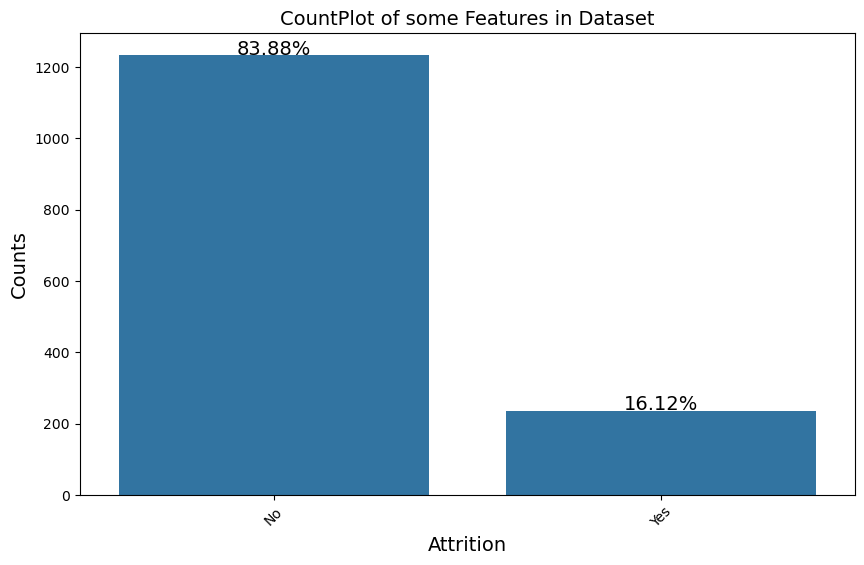

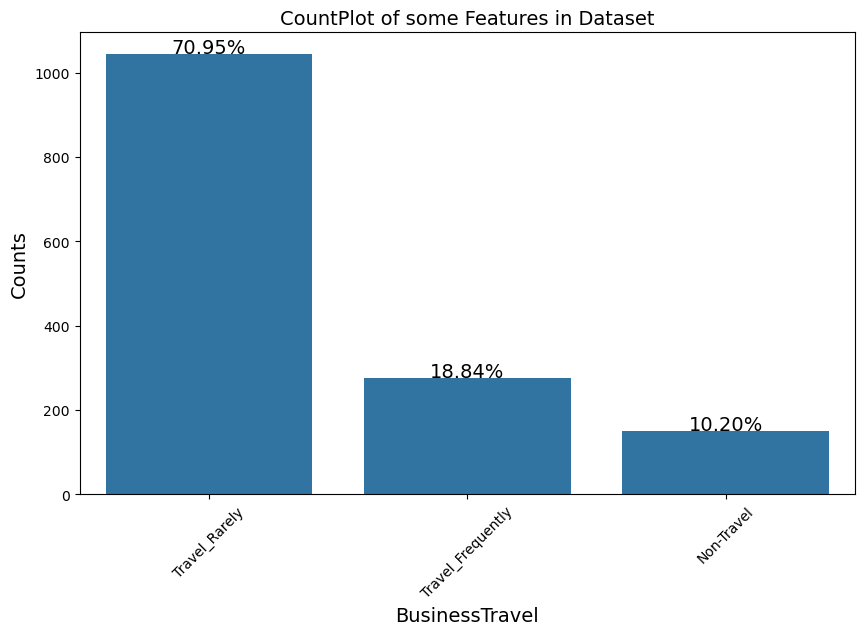

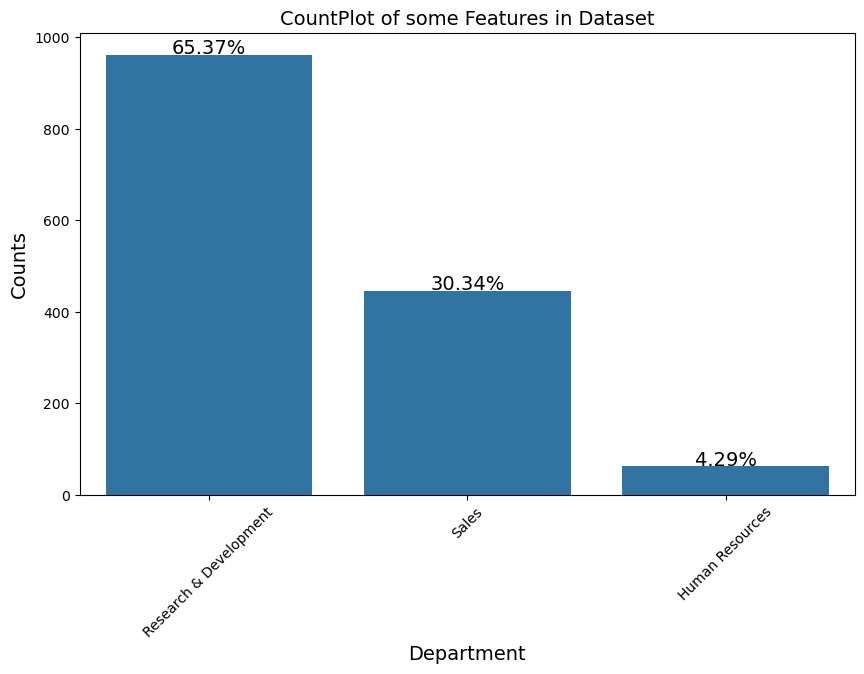

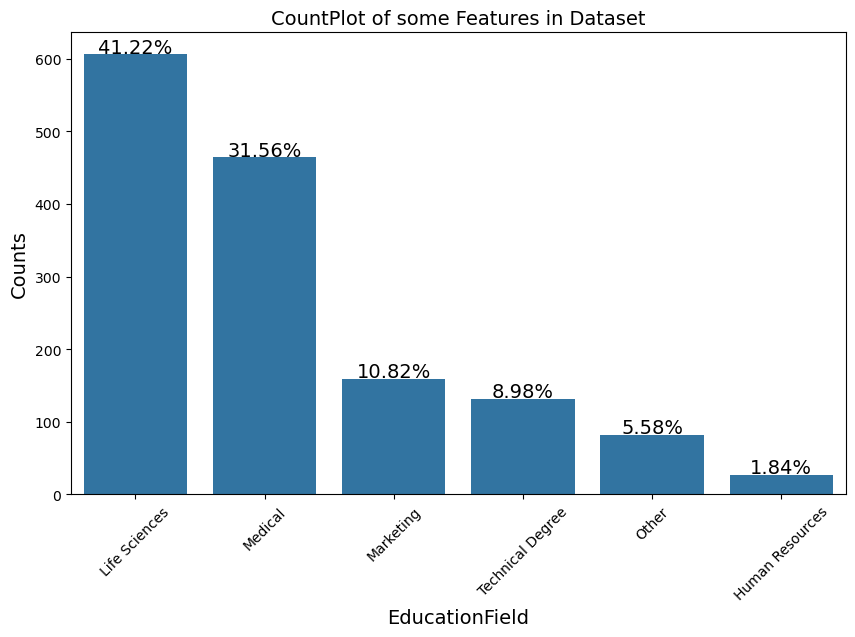

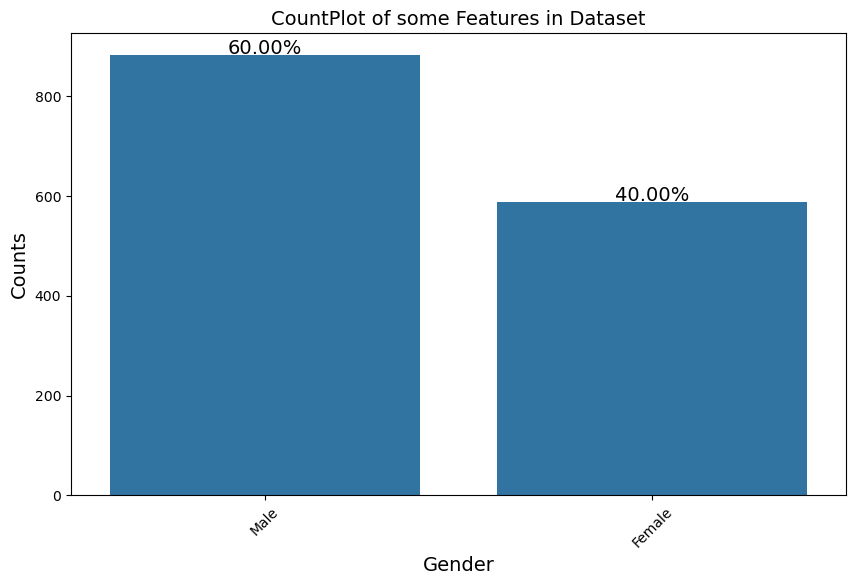

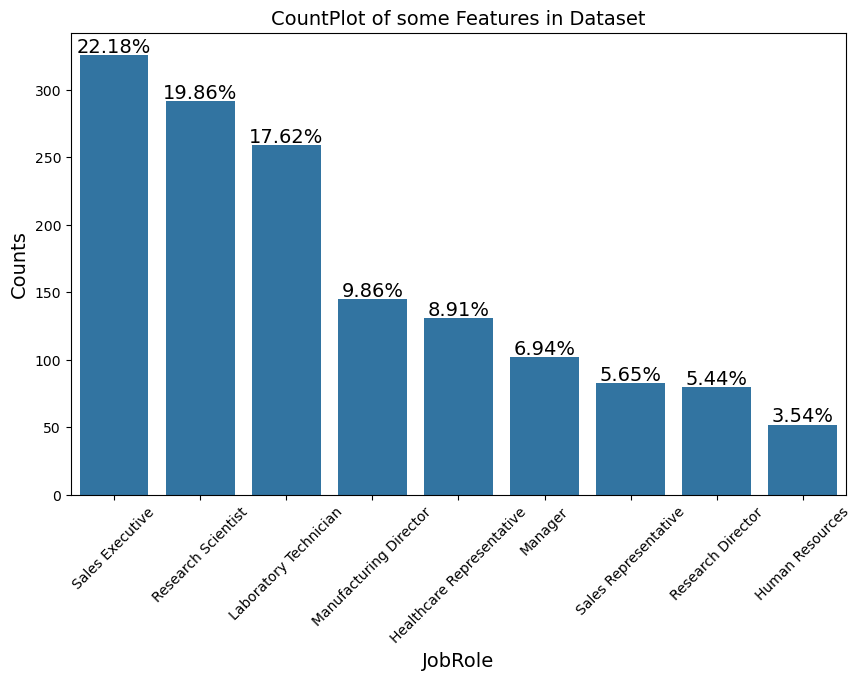

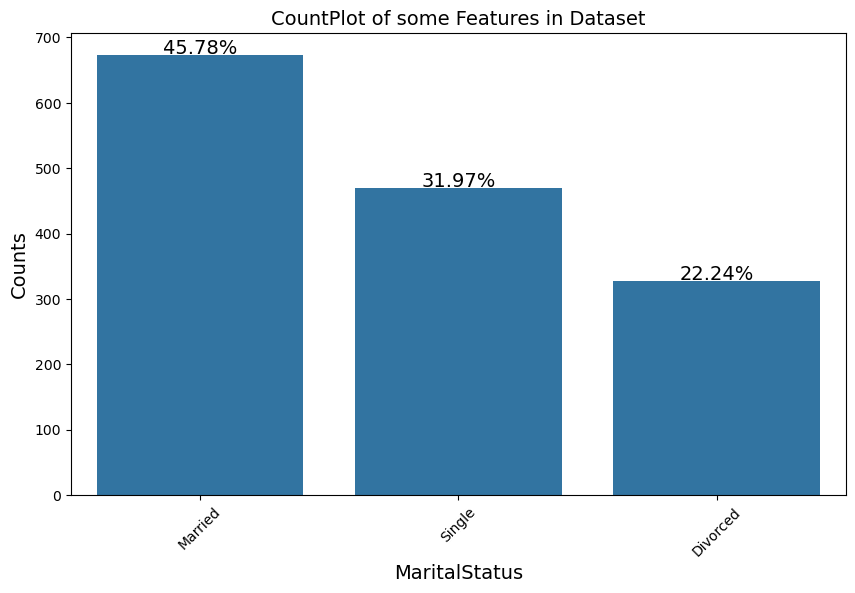

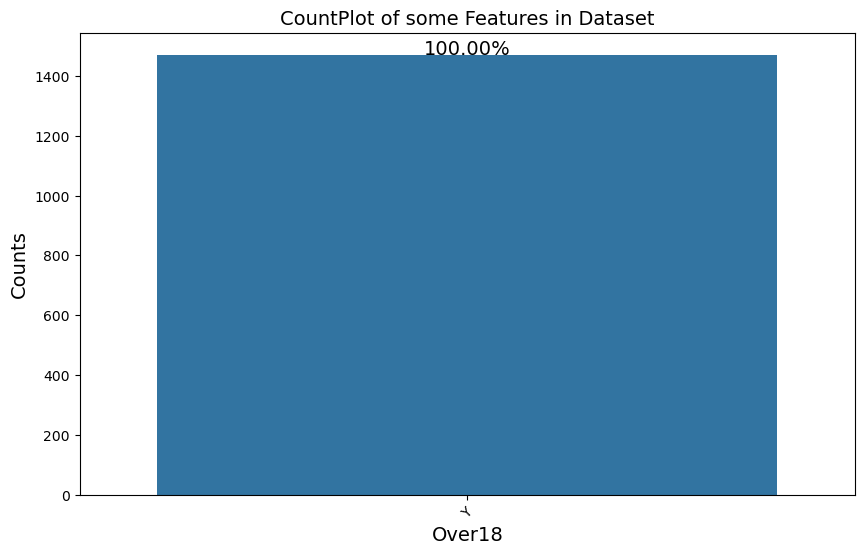

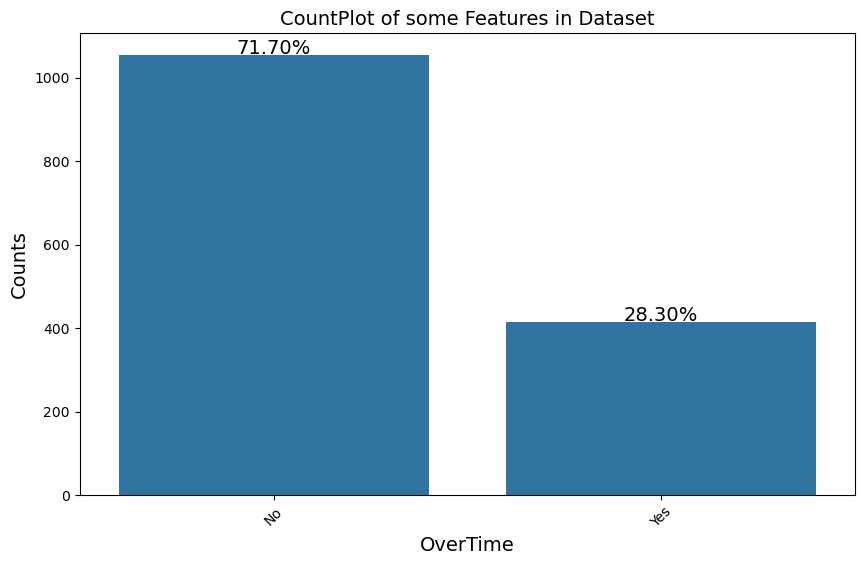

In [66]:
for i in Category:
    Distribution(i)


In [68]:
grouping=df.groupby(['Department'])[['DailyRate','EducationField','BusinessTravel']].max().sort_values(by='DailyRate',ascending=False)
grouping

,DailyRate,EducationField,BusinessTravel
Department,,,
Sales,1499,Technical Degree,Travel_Rarely
Research & Development,1496,Technical Degree,Travel_Rarely
Human Resources,1444,Technical Degree,Travel_Rarely


In [70]:
values_of_Department=df['Department'].value_counts()[: 10]
values_of_Department

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [72]:
mean_value=[df[df['Department']==i]['DailyRate'].mean() for i in list(values_of_Department.index)]
mean_value

[806.8511966701353, 800.2757847533633, 751.5396825396825]

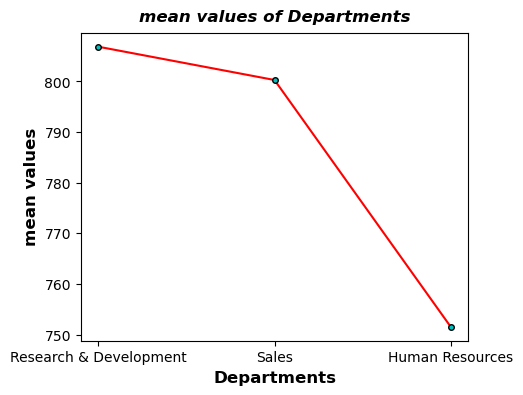

In [74]:
plt.figure(figsize=(5,4))
plt.plot(values_of_Department.index, mean_value, marker='.', ms=8, mec='k', mfc='c',color='red')
plt.title('mean values of Departments', va='bottom', fontweight='heavy',fontstyle='oblique')
plt.xlabel('Departments',fontweight='heavy',fontsize=12)
plt.ylabel('mean values',fontweight='heavy',fontsize=12)
plt.show()

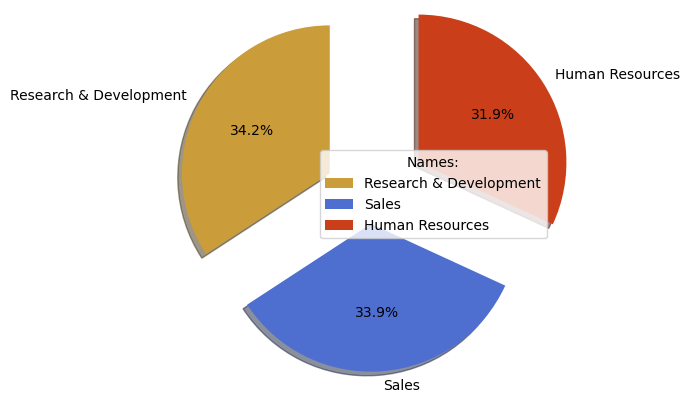

In [76]:
myexplode = [0.3, 0.2 , 0.4]
mycolors = ["#ca9c3a", "#4e6fcf", "#ca3f19"]

plt.pie(mean_value, labels= values_of_Department.index ,explode = myexplode ,colors = mycolors, startangle = 90 , autopct= '%1.1f%%' ,shadow = True)
plt.legend(title = "Names:",loc=5)
plt.show() 

In [78]:
object=df.select_dtypes(include='object')
non_object=df.select_dtypes(exclude='object')

In [80]:
le = LabelEncoder()

In [82]:
for i in range(0,object.shape[1]):
    object.iloc[:,i]=le.fit_transform(object.iloc[:,i])

In [84]:
data=pd.concat([object,non_object],axis=1)

In [86]:
data

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Age,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,2,2,1,0,7,2,0,1,41,...,1,80,0,8,0,1,6,4,0,5
1,0,1,1,1,1,6,1,0,0,49,...,4,80,1,10,3,3,10,7,1,7
2,1,2,1,4,1,2,2,0,1,37,...,2,80,0,7,3,3,0,0,0,0
3,0,1,1,1,0,6,1,0,1,33,...,3,80,0,8,3,3,8,7,3,0
4,0,2,1,3,1,2,1,0,0,27,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,1,3,1,2,1,0,0,36,...,3,80,1,17,3,3,5,2,0,3
1466,0,2,1,3,1,0,1,0,0,39,...,1,80,1,9,5,3,7,7,1,7
1467,0,2,1,1,1,4,1,0,1,27,...,2,80,1,6,0,3,6,2,0,3
1468,0,1,2,3,1,7,1,0,0,49,...,4,80,0,17,3,2,9,6,0,8


In [88]:
sc = StandardScaler()
data['DailyRate'] = sc.fit_transform(data['DailyRate'].values.reshape(-1, 1))

In [90]:
data['Age'] = sc.fit_transform(data['Age'].values.reshape(-1, 1))

In [92]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1470 non-null   object 
 1   BusinessTravel            1470 non-null   object 
 2   Department                1470 non-null   object 
 3   EducationField            1470 non-null   object 
 4   Gender                    1470 non-null   object 
 5   JobRole                   1470 non-null   object 
 6   MaritalStatus             1470 non-null   object 
 7   Over18                    1470 non-null   object 
 8   OverTime                  1470 non-null   object 
 9   Age                       1470 non-null   float64
 10  DailyRate                 1470 non-null   float64
 11  DistanceFromHome          1470 non-null   int64  
 12  Education                 1470 non-null   int64  
 13  EmployeeCount             1470 non-null   int64  
 14  Employee

In [94]:
data['Attrition']=data['Attrition'].astype(int)
data['BusinessTravel']=data['BusinessTravel'].astype(int)
data['Department']=data['Department'].astype(int)
data['EducationField']=data['EducationField'].astype(int)
data['Gender']=data['Gender'].astype(int)
data['JobRole']=data['JobRole'].astype(int)
data['MaritalStatus']=data['MaritalStatus'].astype(int)
data['Over18']=data['Over18'].astype(int)
data['OverTime']=data['OverTime'].astype(int)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1470 non-null   int32  
 1   BusinessTravel            1470 non-null   int32  
 2   Department                1470 non-null   int32  
 3   EducationField            1470 non-null   int32  
 4   Gender                    1470 non-null   int32  
 5   JobRole                   1470 non-null   int32  
 6   MaritalStatus             1470 non-null   int32  
 7   Over18                    1470 non-null   int32  
 8   OverTime                  1470 non-null   int32  
 9   Age                       1470 non-null   float64
 10  DailyRate                 1470 non-null   float64
 11  DistanceFromHome          1470 non-null   int64  
 12  Education                 1470 non-null   int64  
 13  EmployeeCount             1470 non-null   int64  
 14  Employee

In [98]:
data = data.drop('StandardHours', axis=1)

In [100]:
x = data.drop('Attrition', axis=1)

y = data['Attrition']

In [102]:
x

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Age,DailyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,2,1,0,7,2,0,1,0.446350,0.742527,...,3,1,0,8,0,1,6,4,0,5
1,1,1,1,1,6,1,0,0,1.322365,-1.297775,...,4,4,1,10,3,3,10,7,1,7
2,2,1,4,1,2,2,0,1,0.008343,1.414363,...,3,2,0,7,3,3,0,0,0,0
3,1,1,1,0,6,1,0,1,-0.429664,1.461466,...,3,3,0,8,3,3,8,7,3,0
4,2,1,3,1,2,1,0,0,-1.086676,-0.524295,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,1,3,1,2,1,0,0,-0.101159,0.202082,...,3,3,1,17,3,3,5,2,0,3
1466,2,1,3,1,0,1,0,0,0.227347,-0.469754,...,3,1,1,9,5,3,7,7,1,7
1467,2,1,1,1,4,1,0,1,-1.086676,-1.605183,...,4,2,1,6,0,3,6,2,0,3
1468,1,2,3,1,7,1,0,0,1.322365,0.546677,...,3,4,0,17,3,2,9,6,0,8


In [116]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state=42)

In [120]:
linear = LinearRegression()

linear.fit(x_train, y_train)

LinearRegression()

In [122]:
linear.score(x_train, y_train)

0.24728648811746112

In [124]:
y_pred = linear.predict(x_test)
y_pred

array([ 1.91296393e-01, -1.17486961e-01,  1.93173571e-01, -1.22187666e-01,
        1.10913813e-01,  2.39539167e-01,  2.78493409e-01,  5.12900165e-02,
        2.32760200e-01, -7.40179436e-02,  4.00997520e-01,  9.02042889e-02,
        3.68567429e-01,  1.03945913e-01,  6.46851666e-02,  1.19280544e-01,
        3.61789174e-01,  9.99193831e-02,  4.32589190e-01,  1.83348295e-01,
        2.87484650e-01, -1.03232730e-01,  1.45517398e-01,  3.35164887e-01,
        3.09802286e-01, -1.59589403e-02,  2.11184195e-01,  1.07659691e-02,
        2.09815156e-01,  1.90550407e-01,  7.31434989e-02, -8.99596952e-02,
       -1.07363197e-01,  1.04115319e-01,  4.42251828e-01, -7.01627696e-02,
       -1.24584181e-01,  3.70903805e-01,  5.10033425e-01,  1.01811181e-01,
        1.90064403e-01,  2.13063313e-01,  2.28097045e-01,  1.40959039e-01,
        4.50576505e-01,  3.35656410e-02,  5.73546616e-01,  4.76773498e-01,
        3.23064354e-01,  5.95981110e-01,  7.05419445e-02,  2.62339603e-01,
        1.36184196e-01,  

In [126]:
metrics.mean_squared_error(y_test, y_pred)

0.10639455354649734

In [128]:
metrics.mean_absolute_error(y_test, y_pred)


0.24701635015912893

In [130]:
print("Accuracy --> ",metrics.r2_score(y_test, y_pred)*100)

Accuracy -->  12.414668886906433


In [ ]:
dt = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [142]:
print("Accuracy in train--> ",dt.score(x_train, y_train)*100)
print("Accuracy in test--> ",dt.score(x_test , y_test)*100)

Accuracy in train-->  49.08379891780549
Accuracy in test-->  -11.758765173253604


In [144]:
y_predicte = dt.predict(x_test)
print("mean_squared_error=",metrics.mean_squared_error(y_test,y_predicte ))
print("mean_absolute_error=",metrics.mean_absolute_error(y_test, y_predicte))

mean_squared_error= 0.13575930780192685
mean_absolute_error= 0.210348048015485


In [158]:
regressor = RandomForestRegressor(n_estimators=50,max_depth=8,random_state=0 ,max_samples=0.8)

regressor.fit(x_train, y_train)


RandomForestRegressor(max_depth=8, max_samples=0.8, n_estimators=50,
                      random_state=0)

In [160]:
print("Accuracy in train--> ",regressor.score(x_train, y_train)*100)
print("Accuracy in test--> ",regressor.score(x_test , y_test)*100)

Accuracy in train-->  73.44942587860979
Accuracy in test-->  17.449347605248235


In [162]:
y_prediction = regressor.predict(x_test)
print("mean_squared_error=",metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error=",metrics.mean_absolute_error(y_test, y_pred))

mean_squared_error= 0.10639455354649734
mean_absolute_error= 0.24701635015912893


In [164]:
error_score = metrics.r2_score(y_test,y_pred )
print('R squared error : ', error_score *100)

R squared error :  12.414668886906433


In [166]:
GBR = GradientBoostingRegressor(n_estimators=200, max_depth=7)

In [170]:
gbr = GBR.fit(x_train, y_train)


In [171]:
print("Accuracy in train--> ",gbr.score(x_train, y_train)*100)
print("Accuracy in test--> ",gbr.score(x_test, y_test)*100)

Accuracy in train-->  99.99947510526343
Accuracy in test-->  -3.7987082806506534


In [174]:
y_pred= gbr.predict((x_test))


In [176]:
print("mean_squared_error=",metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error=",metrics.mean_absolute_error(y_test, y_pred))


mean_squared_error= 0.12608980391891192
mean_absolute_error= 0.21512880230708975


In [178]:
error_score = metrics.r2_score(y_test, y_pred ) 
print('R squared error : ', error_score *100)

R squared error :  -3.7987082806506534


In [198]:
model1 = KNeighborsRegressor(n_neighbors=5 )

model1.fit(x_train, y_train)



KNeighborsRegressor()

In [200]:
print("Accuracy in train--> ",model1.score(x_train, y_train)*100)
print("Accuracy in test--> ",model1.score(x_test, y_test)*100)

Accuracy in train-->  26.119951040391655
Accuracy in test-->  -20.6482384493478


In [184]:
y_pred = model1.predict(x_test)
print("mean_squared_error=",metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error=",metrics.mean_absolute_error(y_test, y_pred))

mean_squared_error= 0.1540816326530612
mean_absolute_error= 0.2537414965986395
